<a href="https://colab.research.google.com/github/prashantiyaramareddy/AI-ML-Learnings/blob/master/MachineLearning/SupportVectorRegression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **What is SVR?**

**SVR** is a machine learning method to find a smooth line (or curve) that best fits your data points.

Imagine you have a bunch of dots on a piece of paper (your data), and you want to draw a line that goes as close as possible to all of them, but you don’t want the line to wiggle wildly to hit every single point. You want it to be smooth.


## 2. **What makes SVR special?**

- **SVR doesn’t try to pass through all points.**
- It allows some points to be a little above or below the line, as long as they’re within a certain “tube” around the line.
- **The “tube”** is like a safety zone: if a point is inside, we don’t care about its error; if it’s outside, we care, but we don’t want to care too much (to avoid overreacting to outliers).

---

## 3. **Key ideas in SVR**

- **The Tube $\epsilon\$**:  
  Imagine a thick line, not a thin one. Points inside the thickness are “good enough.”  
  If a point is outside, we pay a penalty.

- **Smoothness $C$**:  
  We want the line to be as flat as possible, not zigzagging.  
  But if we make the line too flat, it might miss too many points.  
  $C$ is a knob that controls how much we care about being flat vs. getting close to the points.

---

## 4. **How does SVR find the best line?**

- It tries to **find the flattest line** that keeps as many points as possible inside the tube.
- If some points are outside, it tries not to let them influence the line too much.

---

## 5. **How does the algorithm work?**

### a. **Set up the problem**

- We decide how thick the tube should be ($\epsilon\$), and how much we care about outliers (\(C\)).
- We pick a way to measure similarity between points (the **kernel**). For simple problems, just use the dot product (linear kernel).

### b. **Let the computer solve a puzzle**

- The computer sets up a kind of balancing act:
  - Make the line as flat as possible.
  - Keep as many points inside the tube as possible.
  - Don’t let outliers pull the line too much.
- This balancing act is called an **optimization problem**.
- The computer solves this puzzle using a mathematical tool called a **quadratic programming (QP) solver**.  
  (You can think of this as a calculator that finds the best compromise.)

### c. **Get the answer**

- The solver tells us how to draw the best line:
  - Which points are most important (the “support vectors” — the ones just outside or on the edge of the tube).
  - The position and tilt of the line (the “weights” and “bias”).

---

## 6. **What happens when you want to predict for new data?**

- You take the new point, measure how similar it is to the important points found earlier (the support vectors), and use those to calculate the predicted value.
- The influence of each important point is determined by how much it was outside the tube in the original data.

---

## 7. **Analogy**

Imagine you’re laying a garden hose (the regression line) on a bumpy lawn (your data points).  
You want the hose to be as straight as possible, but you’re allowed to drape it over some bumps as long as they’re not too high (inside the tube).  
If a bump is too high (an outlier), you don’t want to let it yank the hose way off course — you just let it be, and accept a small penalty.

---

## 8. **Summary Table**

| Term           | What it means (in plain English)                           |
|----------------|-----------------------------------------------------------|
| Tube (\(\epsilon\)) | How close points must be to the line to count as “good enough” |
| Flatness (\(C\))    | How much we care about keeping the line straight      |
| Support vectors     | The “important” points that touch or poke outside the tube |
| Kernel              | How we measure similarity between points              |
| Penalty             | How much we care about points outside the tube        |


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

### Importing Dataset

In [3]:
data = pd.read_csv('Position_Salaries.csv')

X = data.iloc[:, 1:-1].values
y = data.iloc[:,-1].values
y = y.reshape(len(y), 1)

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
### Apply standard scalar
sc_X = StandardScaler()
sc_y = StandardScaler()
X= sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


### Fit SVR model

In [9]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
# Predict on the test set
y_pred = svr_model.predict(X)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [11]:
print(y_pred)

[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


### Metrics

In [15]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("R²:", r2)
print("MSE:", mse)

R²: -75289554857.61282
MSE: 75289554858.6128


In [ ]:
# Plot Predicted vs Actual

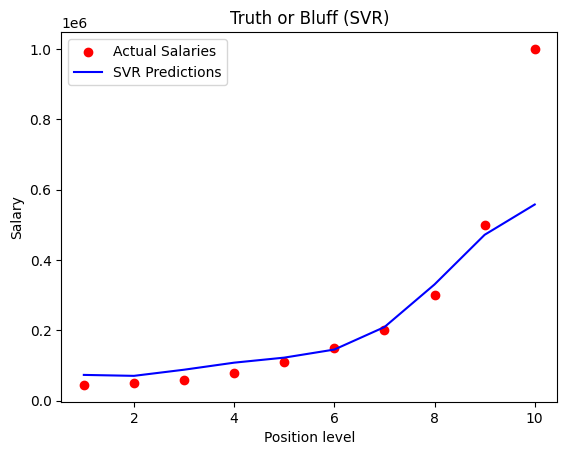

In [17]:
# 1. Prepare X-axis data (Position Level)
# The 'Level' column is the last one in the X array after OneHotEncoding.
X_level_for_plot = sc_X.inverse_transform(X)[:, -1]

# 2. Prepare Y-axis data (Actual Salary)
y_actual_for_plot = sc_y.inverse_transform(y).flatten()

# Now plot
plt.scatter(X_level_for_plot, y_actual_for_plot, color = 'red', label='Actual Salaries')
plt.plot(X_level_for_plot, y_pred, color = 'blue', label='SVR Predictions')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


1. **SVR Formulation**  
2. **Dual Problem Construction**  
3. **Quadratic Programming Setup**  
4. **Extracting the Solution**  
5. **Prediction**

---

## 1. SVR Formulation

SVR aims to find a function $f(x) = w^T x + b $ that approximates the targets \( y \) with as much flatness as possible, allowing for an error tolerance $\epsilon$.

**Objective:**
$$
\min_{w, b, x_i, x_i^*} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n (x_i + x^*_i)
$$

**Subject to:**
\[
\begin{align*}
y_i - w^T x_i - b &\leq \epsilon + x_i \\
w^T x_i + b - y_i &\leq \epsilon + x^*_i \\
x_i, x^*_i &\geq 0
\end{align*}
\]

- \( \epsilon \): Tube width (tolerance)
- \( C \): Regularization parameter (controls penalty for errors)
- \( \xi_i, \xi^*_i \): Slack variables (penalize errors outside the tube)

---

## 2. Dual Problem Construction

To solve efficiently, we move to the **dual form** using Lagrange multipliers $\alpha_i, \alpha^*_i $)):

$$
\max_{\alpha, \alpha^*} -\frac{1}{2} \sum_{i,j=1}^n (\alpha_i - \alpha^*_i)(\alpha_j - \alpha^*_j) K(x_i, x_j) - \epsilon \sum_{i=1}^n (\alpha_i + \alpha^*_i) + \sum_{i=1}^n y_i (\alpha_i - \alpha^*_i)
$$

**Subject to:**
\[
\begin{align*}
\sum_{i=1}^n (\alpha_i - \alpha^*_i) = 0 \\
0 \leq \alpha_i, \alpha^*_i \leq C
\end{align*}
\]

- \( K(x_i, x_j) \): Kernel function (linear, RBF, etc.)

---

## 3. Quadratic Programming Setup

This dual problem is a **Quadratic Programming (QP)** problem, which can be solved with libraries like `cvxopt`.

### **QP Standard Form:**
$$
\min_x \frac{1}{2} x^T P x + q^T x \\
\text{subject to } Gx \leq h, \quad Ax = b
$$

### **Mapping SVR Dual to QP:**

- **Variables:** \( x = [\alpha_1, ..., \alpha_n, \alpha^*_1, ..., \alpha^*_n] \) (length \(2n\))
- **P:** Block matrix using the kernel \( K \)
- **q:** Vector using \( \epsilon \) and \( y \)
- **G, h:** To enforce \( 0 \leq \alpha_i, \alpha^*_i \leq C \)
- **A, b:** To enforce \( \sum (\alpha_i - \alpha^*_i) = 0 \)

#### Example for \( n=2 \):

\[
P = \begin{bmatrix}
K & -K \\
-K & K
\end{bmatrix}
\]
\[
q = \begin{bmatrix}
\epsilon - y_1 \\
\epsilon - y_2 \\
\epsilon + y_1 \\
\epsilon + y_2
\end{bmatrix}
\]

---

## 4. Extracting the Solution

After solving the QP, you get \( \alpha, \alpha^* \):

- **Support vectors:** Where \( |\alpha_i - \alpha^*_i| > 0 \)
- **Weight vector (for linear kernel):**
    \[
    w = \sum_{i=1}^n (\alpha_i - \alpha^*_i) x_i
    \]
- **Bias term \( b \):**
    \[
    b = y_i - \sum_j (\alpha_j - \alpha^*_j) K(x_j, x_i) - \epsilon \cdot \text{sign}(\alpha_i - \alpha^*_i)
    \]
    (averaged over support vectors)

---

## 5. Prediction

Given a new \( x \):

- **Linear kernel:** \( f(x) = w^T x + b \)
- **Kernelized:** \( f(x) = \sum_{i \in SV} (\alpha_i - \alpha^*_i) K(x_i, x) + b \)

---

## 6. Code Mapping

Here’s how these steps map to the code:

| SVR Step            | Code Section                              |
|---------------------|-------------------------------------------|
| Kernel computation  | `self._kernel(X, X)`                      |
| QP matrices         | `P`, `q`, `G`, `h`, `A`, `b` construction |
| Solve QP            | `solvers.qp(P, q, G, h, A, b)`            |
| Extract alphas      | `alphas = ...`                            |
| Select SVs          | `sv_mask = ...`                           |
| Compute bias        | `self.b = ...`                            |
| Predict             | `self.predict(X)`                         |

---

## 7. Visualization

After fitting, you can visualize the regression curve and data points to confirm the fit.

---

## **Summary Table**

| Symbol              | Meaning                                    |
|---------------------|--------------------------------------------|
| \( C \)             | Regularization parameter                   |
| \( \epsilon \)      | Tube width                                 |
| \( \alpha, \alpha^* \) | Lagrange multipliers                    |
| \( K(x_i, x_j) \)   | Kernel function                            |
| \( w \)             | Weight vector (linear case)                |
| \( b \)             | Bias term                                  |

---

### **References**

- [Vapnik, V. (1995). The Nature of Statistical Learning Theory.](https://en.wikipedia.org/wiki/Support-vector_machine#Support_vector_regression)
- [LIBSVM Guide](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf) (Section 4.2)
